In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [58]:
df = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Decision Trees/Company_Data.csv")

In [59]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [60]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [61]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [62]:
df['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [63]:
df['US'].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), float64(1), int64(7), object(2)
memory usage: 31.9+ KB


In [66]:
df['Urban'] = df['Urban'].astype('category')
df['US'] = df['US'].astype('category')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.6 KB


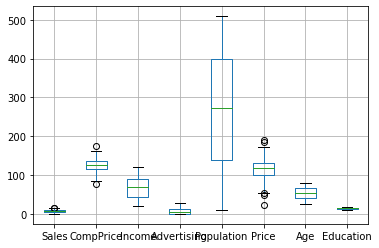

In [68]:
df.boxplot()

In [69]:
df1=pd.get_dummies(df)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [70]:
from sklearn.ensemble import IsolationForest
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df1)
# predictions
y_pred_outliers = clf.predict(df1)
df1['anomaly']=clf.predict(df1.iloc[:,:])
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [71]:
df1[df1['anomaly'] ==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anomaly
25,14.90,139,32,0,176,82,54,11,0,1,0,1,0,1,0,-1
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-1
284,6.97,106,46,11,414,96,79,17,1,0,0,1,0,1,0,-1
317,6.41,142,30,0,472,136,80,15,0,1,0,1,0,1,0,-1


In [72]:
df2 = df1.drop(df1.index[[25,75,284,317]], axis = 0).reset_index()
df2

,index,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anomaly
0,0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1
392,396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
393,397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
394,398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [73]:
sales_val = []
for value in df2["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
df2["sales_val"]= sales_val
df2

,index,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anomaly,sales_val
0,0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1,high
1,1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1,high
2,2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1,high
3,3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1,low
4,4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1,high
392,396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1,low
393,397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1,low
394,398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1,low


In [74]:
x=df2.drop(['sales_val','Sales'],axis=1)
y=df2['sales_val']

In [75]:
x = x.drop(['anomaly'], axis = 1)

In [76]:
x = x.drop(['index'], axis = 1)

In [77]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,138,108,17,203,128,33,14,0,1,0,0,1,0,1
392,139,23,3,37,120,55,11,0,0,1,1,0,0,1
393,162,26,12,368,159,40,18,0,0,1,0,1,0,1
394,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [78]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
391    high
392     low
393     low
394     low
395    high
Name: sales_val, Length: 396, dtype: object

In [79]:
df2['sales_val'].value_counts()

low     199
high    197
Name: sales_val, dtype: int64

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [102]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
166,129,89,0,425,117,45,10,0,0,1,0,1,1,0
349,107,67,12,430,92,35,12,0,0,1,1,0,0,1
257,123,36,10,467,100,74,11,1,0,0,1,0,0,1
49,99,32,18,341,108,80,16,1,0,0,0,1,0,1
54,143,81,5,60,154,61,18,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,131,111,13,33,80,68,18,1,0,0,0,1,0,1
165,106,73,0,216,93,60,13,0,0,1,0,1,1,0
7,136,81,15,425,120,67,10,0,1,0,0,1,0,1
219,124,44,0,125,107,80,11,0,0,1,0,1,1,0


In [81]:
# Decision Tree C5.0
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

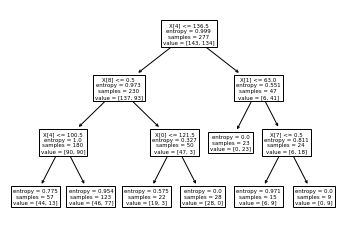

In [82]:
#PLot the decision tree
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy')

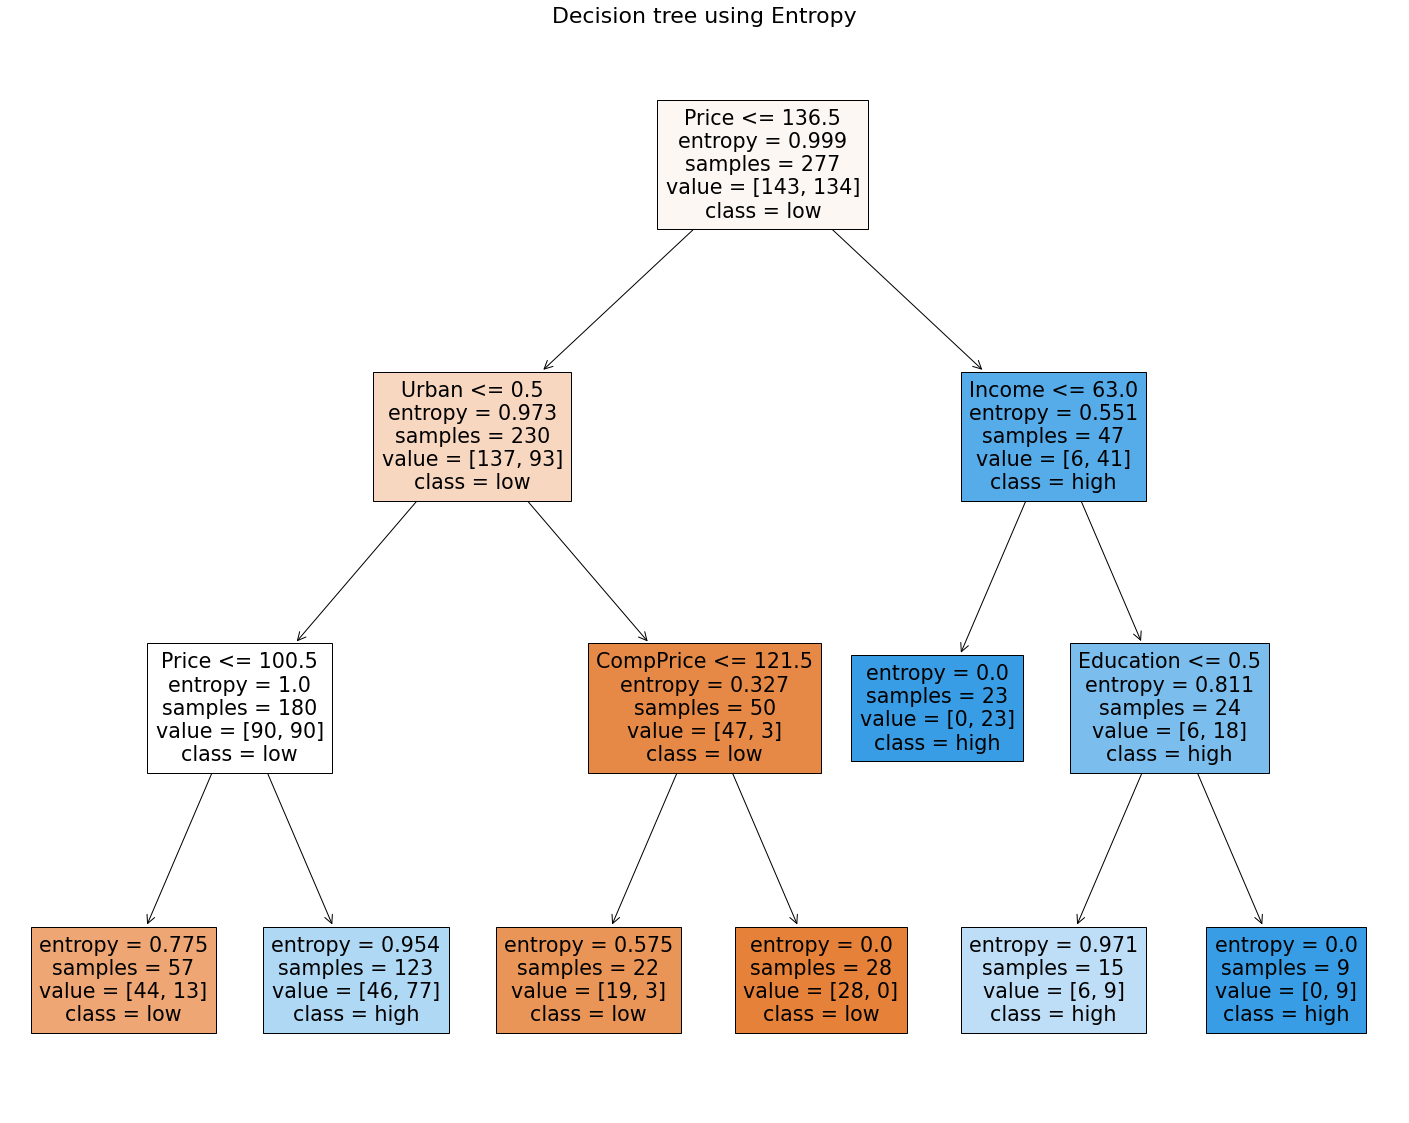

In [83]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

In [84]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

low     79
high    40
dtype: int64

In [85]:
pd.crosstab(y_test,preds)

col_0,high,low
sales_val,,
high,30,24
low,10,55


In [86]:
#accuracy
np.mean(preds==y_test)

0.7142857142857143

In [87]:
# Decision Tree CART
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [92]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [94]:
pred_gini = model_gini.predict(x_test)
pred_gini

array(['high', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'low', 'high', 'low', 'high', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'low', 'high', 'low', 'high', 'high',
       'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high'], dtype=object)

In [95]:
np.mean(pred_gini==y_test)

0.7142857142857143

Text(0.5, 1.0, 'Decision tree using Gini')

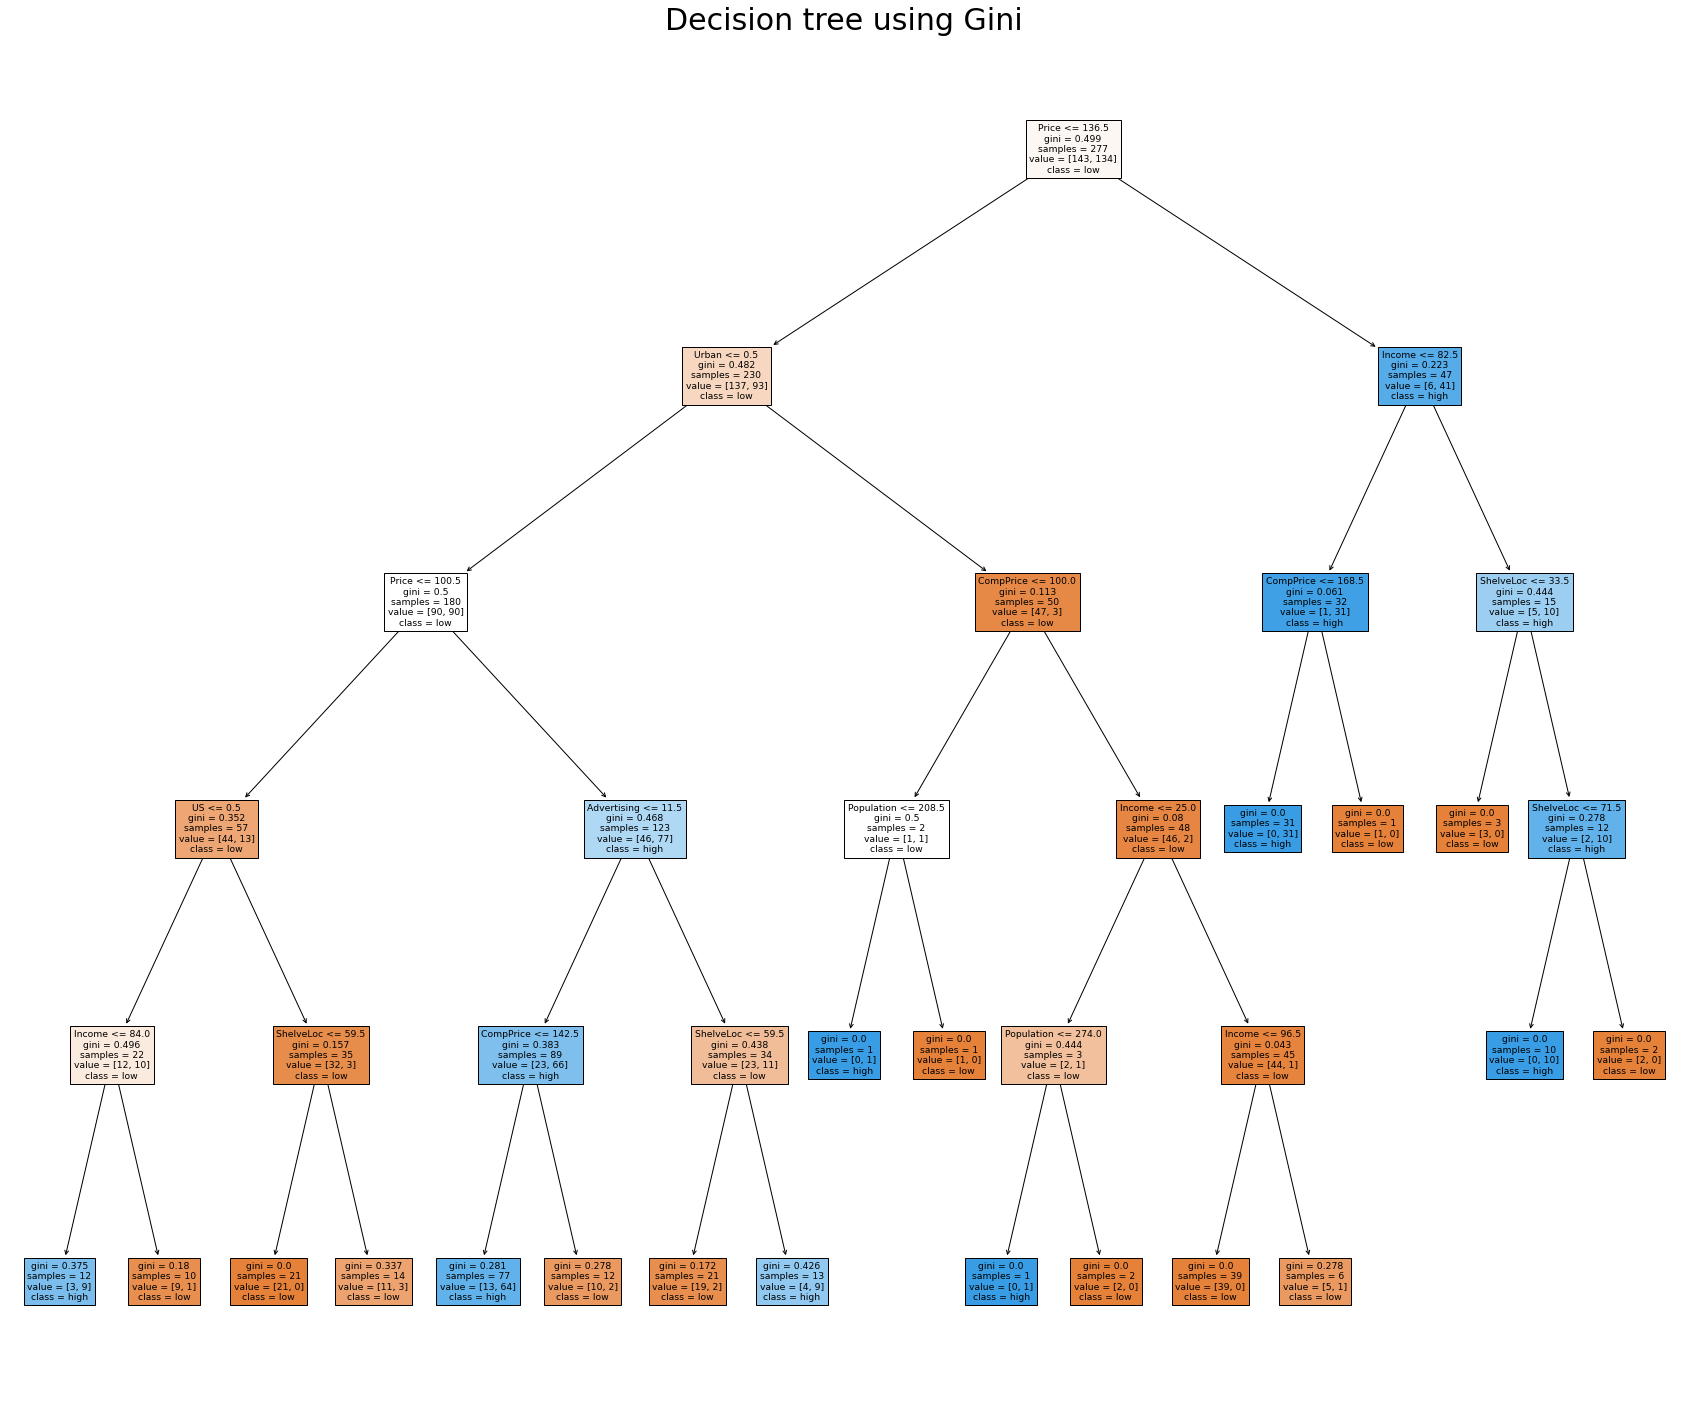

In [101]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=30)